<a href="https://colab.research.google.com/github/Ron0524/note/blob/master/%E6%9C%9F%E4%B8%AD%E5%A0%B1%E5%91%8A/08_financial_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Financial Time Series

In [0]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

## Financial Data

### Data Import

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/yhilpisch/py4fi2nd/master/source/tr_eikon_eod_data.csv',  
                   index_col=0, 
                   parse_dates=True)  

In [0]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [0]:
data.head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [0]:
data.tail()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65


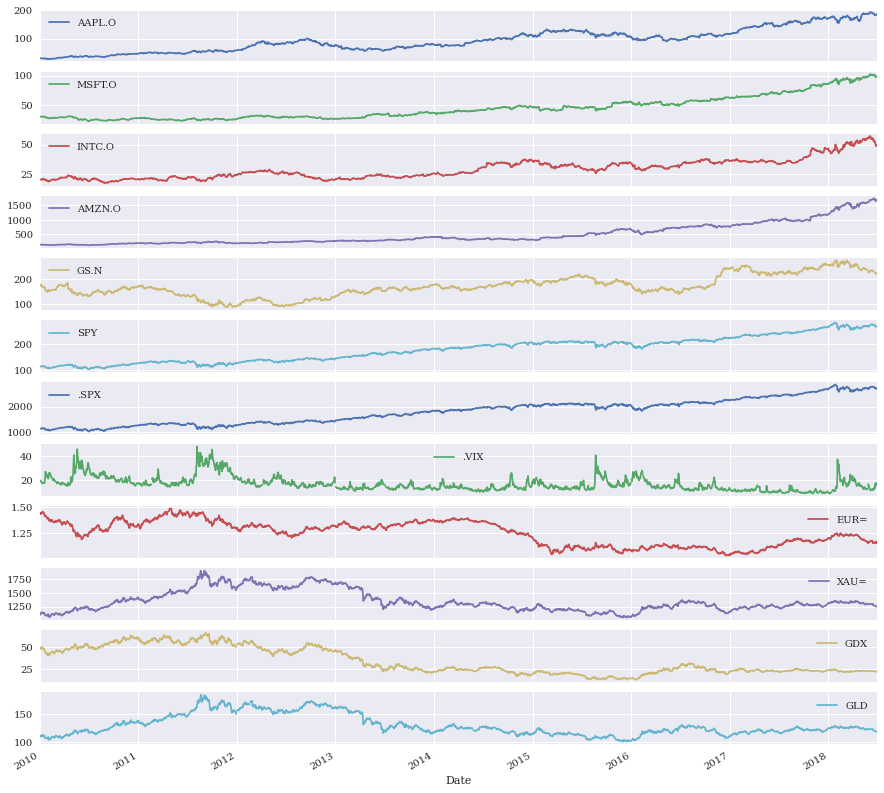

In [0]:
data.plot(figsize=(15, 15), subplots=True); 
# subplots 是否分開表示
# figsize 圖片大小
# plt.savefig('../../images/ch08/fts_01.png');

In [0]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

In [0]:
for ric, name in zip(data.columns, instruments):
    print('{:19s} | {}'.format(ric, name))

AAPL.O              | Apple Stock
MSFT.O              | Microsoft Stock
INTC.O              | Intel Stock
AMZN.O              | Amazon Stock
GS.N                | Goldman Sachs Stock
SPY                 | SPDR S&P 500 ETF Trust
.SPX                | S&P 500 Index
.VIX                | VIX Volatility Index
EUR=                | EUR/USD Exchange Rate
XAU=                | Gold Price
GDX                 | VanEck Vectors Gold Miners ETF
GLD                 | SPDR Gold Trust


### Summary Statistics

In [0]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [0]:
data.describe().round(2)  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [0]:
data.mean()  

AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

In [0]:
data.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


### Changes Over Time

In [0]:
data.diff().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69


In [0]:
data.diff().mean()  

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

In [0]:
data.pct_change().round(3).head()  
#顯示顯五筆與上一筆資料的變化百分比，小數點後第三位，

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


In [0]:
data.pct_change().mean()

# 顯示與前一筆資料的變化百分比之平均值

AAPL.O    0.000936
MSFT.O    0.000621
INTC.O    0.000499
AMZN.O    0.001332
GS.N      0.000242
SPY       0.000436
.SPX      0.000438
.VIX      0.002888
EUR=     -0.000075
XAU=      0.000109
GDX      -0.000072
GLD       0.000085
dtype: float64

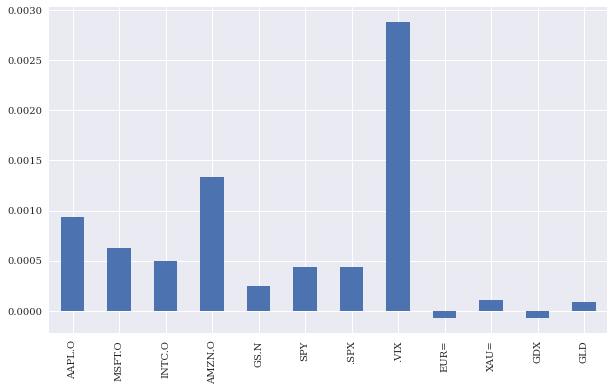

In [0]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_02.png');
# 以直方圖繪出

In [0]:
rets = np.log(data / data.shift())  
rets.head().round(3)  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


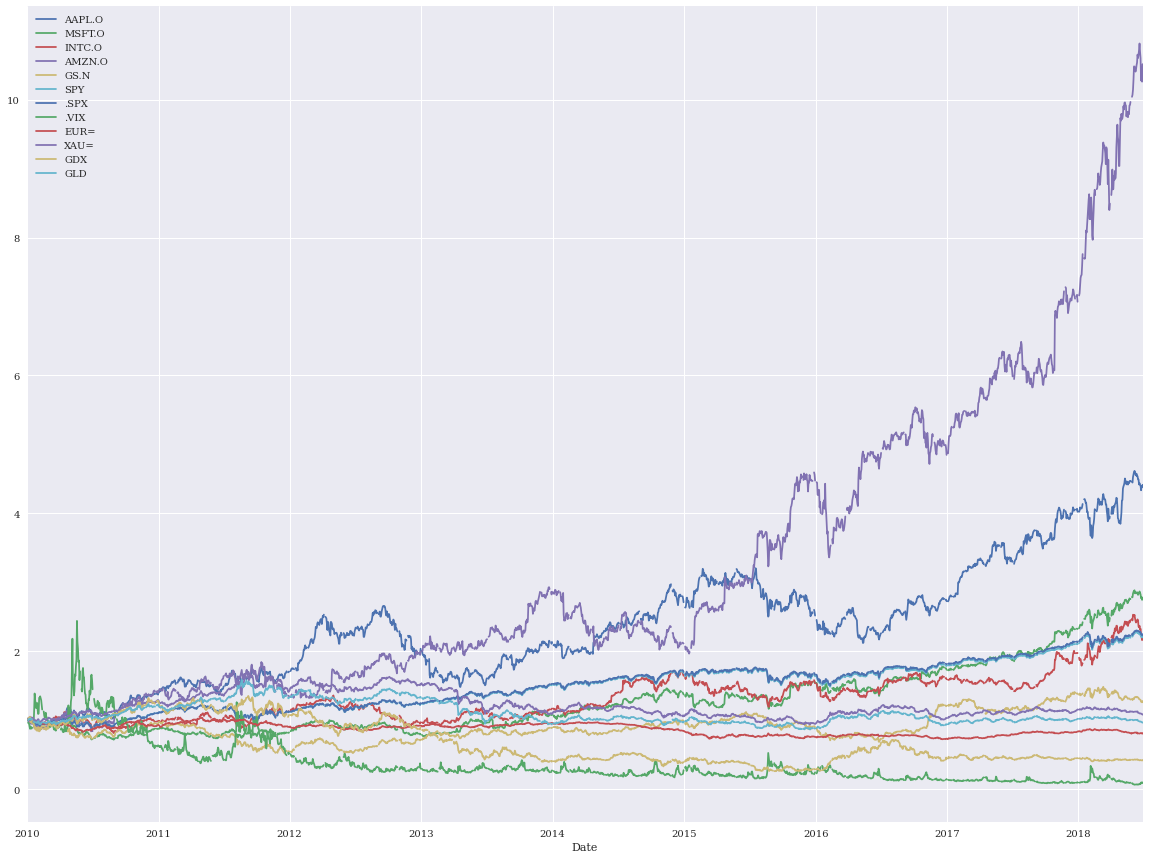

In [0]:
rets.cumsum().apply(np.exp).plot(figsize=(20, 15));  
# plt.savefig('../../images/ch08/fts_03.png');

### Resampling

In [0]:
data.resample('1w', label='right').last().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


In [0]:
data.resample('1m', label='right').last().head()  

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


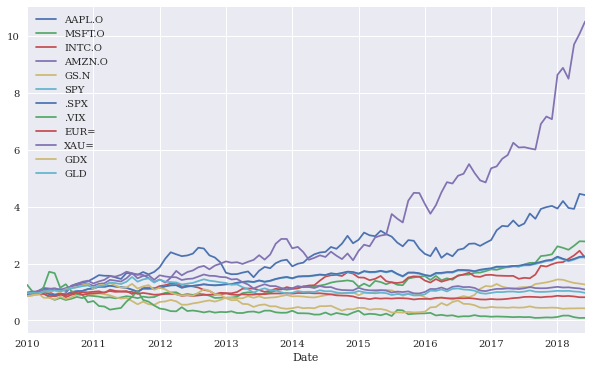

In [0]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last(
                          ).plot(figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_04.png');

## Rolling Statistics

In [0]:
sym = 'AAPL.O'

In [0]:
data = pd.DataFrame(data[sym]).dropna()

In [0]:
data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


### An Overview

In [0]:
window = 20  

In [0]:
data['min'] = data[sym].rolling(window=window).min()  

In [0]:
data['mean'] = data[sym].rolling(window=window).mean()  

In [0]:
data['std'] = data[sym].rolling(window=window).std()  

In [0]:
data['median'] = data[sym].rolling(window=window).median()  

In [0]:
data['max'] = data[sym].rolling(window=window).max()  

In [0]:
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()  

In [0]:
data.dropna().tail()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2018-06-25,182.17,182.17,189.2060,3.262549,189.54,193.98,182.907462
2018-06-26,184.43,182.17,189.0325,3.423931,189.54,193.98,184.049366
2018-06-27,184.16,182.17,188.8655,3.580486,189.54,193.98,184.132341
2018-06-28,185.50,182.17,188.7970,3.633386,189.54,193.98,185.158085
2018-06-29,185.11,182.17,188.5405,3.706497,188.79,193.98,185.122021


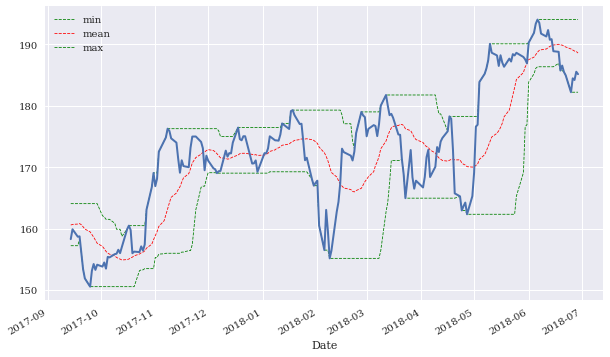

In [0]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);
# plt.savefig('../../images/ch08/fts_05.png');

### A Technical Analysis Example

In [0]:
data['SMA1'] = data[sym].rolling(window=42).mean()  

In [0]:
data['SMA2'] = data[sym].rolling(window=252).mean()  

In [0]:
data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627
2018-06-29,185.11,187.470476,168.901032


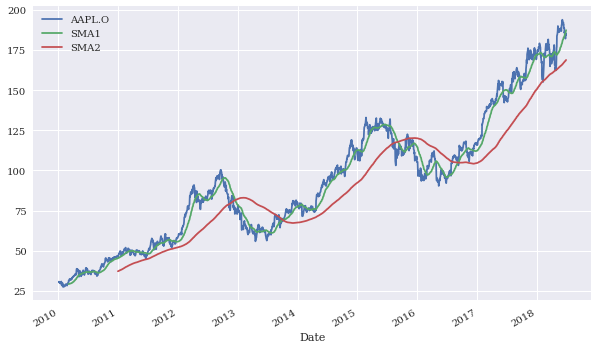

In [0]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_06.png');

In [0]:
data.dropna(inplace=True)  

In [0]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'],  
                             1,  
                             -1)  

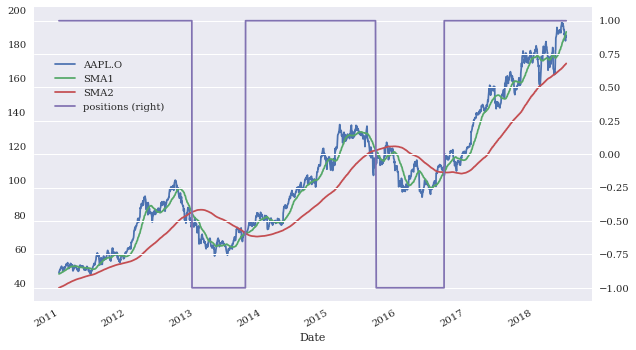

In [0]:
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),
                                              secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch08/fts_07.png');

## Regression Analysis

### The Data

In [0]:
# EOD data from Thomson Reuters Eikon Data API
raw = pd.read_csv('https://raw.githubusercontent.com/yhilpisch/py4fi2nd/master/source/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [0]:
raw[['.SPX', '.VIX']]

,.SPX,.VIX
Date,,
2010-01-01,NaN,NaN
2010-01-04,1132.99,20.04
2010-01-05,1136.52,19.35
2010-01-06,1137.14,19.16
2010-01-07,1141.69,19.06
...,...,...
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91


In [0]:
data = raw[['.SPX', '.VIX']].dropna()

In [0]:
data.tail()

,.SPX,.VIX
Date,,
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91
2018-06-28,2716.31,16.85
2018-06-29,2718.37,16.09


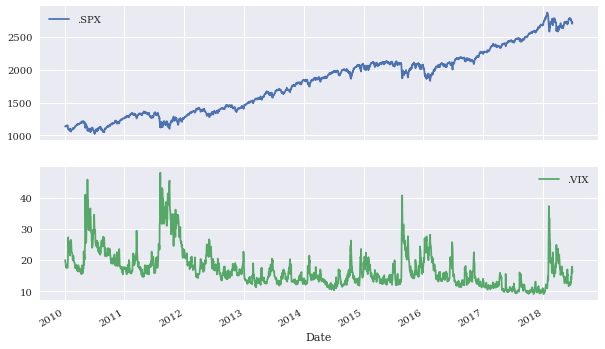

In [0]:
data.plot(subplots=True, figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_08.png');

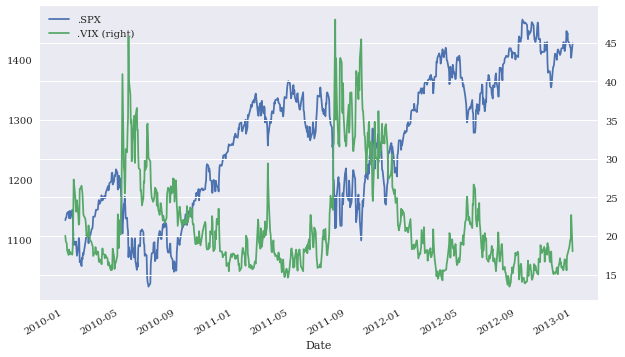

In [0]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_09.png');

### Log Returns

In [0]:
rets = np.log(data / data.shift(1)) 

In [0]:
rets.head()

In [0]:
rets.dropna(inplace=True)

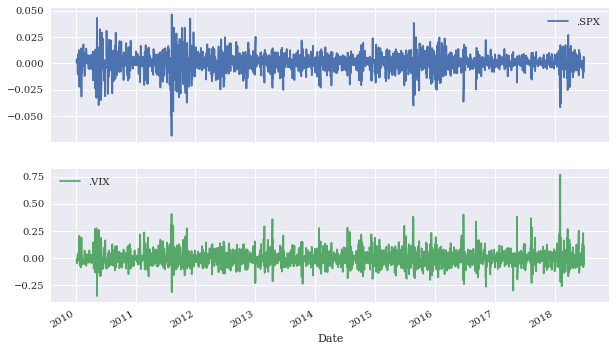

In [0]:
rets.plot(subplots=True, figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_10.png');

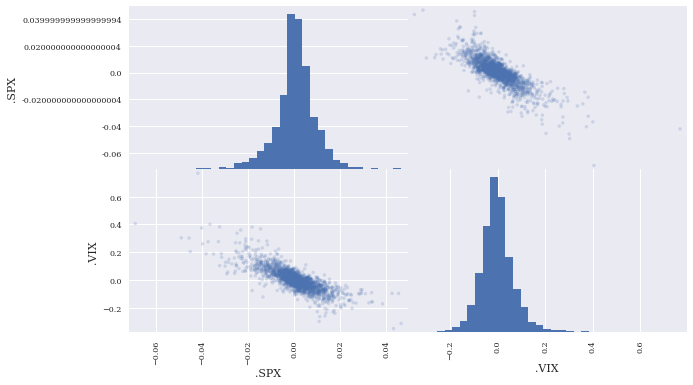

In [0]:
pd.plotting.scatter_matrix(rets,  
                           alpha=0.2,  
                           diagonal='hist',
                           hist_kwds={'bins': 35},  
                           figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_11.png');

### OLS Regression

In [0]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)  

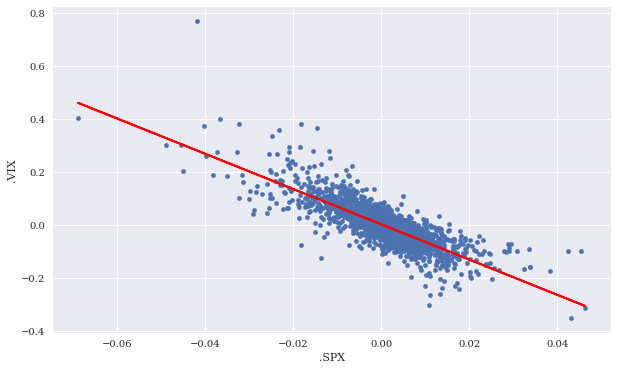

In [0]:
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))  
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);  
# plt.savefig('../../images/ch08/fts_12.png');

### Correlation

In [0]:
rets.corr()  

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


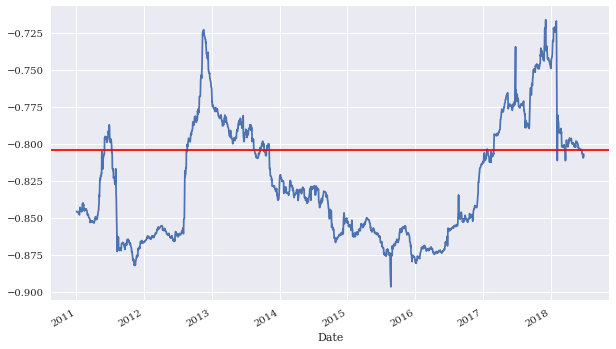

In [0]:
ax = rets['.SPX'].rolling(window=252).corr(
                  rets['.VIX']).plot(figsize=(10, 6))  
ax.axhline(rets.corr().iloc[0, 1], c='r');  
# plt.savefig('../../images/ch08/fts_13.png');

## High Frequency Data

In [0]:
# from fxcmpy import fxcmpy_tick_data_reader as tdr
# data = tdr('EURUSD', start='2018-6-25', end='2018-06-30')
# data.get_data(start='2018-6-29',
#               end='2018-06-30').to_csv('../../source/fxcm_eur_usd_tick_data.csv')

In [0]:
%%time
# data from FXCM Forex Capital Markets Ltd.
tick = pd.read_csv('https://raw.githubusercontent.com/yhilpisch/py4fi2nd/master/source/fxcm_eur_usd_tick_data.csv',
                     index_col=0, parse_dates=True)



CPU times: user 488 ms, sys: 33.9 ms, total: 522 ms
Wall time: 836 ms


In [0]:
tick

,Bid,Ask
2018-06-29 00:00:00.082,1.15635,1.15636
2018-06-29 00:00:00.106,1.15634,1.15636
2018-06-29 00:00:00.114,1.15634,1.15635
2018-06-29 00:00:00.121,1.15634,1.15634
2018-06-29 00:00:00.151,1.15632,1.15634
...,...,...
2018-06-29 20:59:00.011,1.16815,1.16859
2018-06-29 20:59:00.279,1.16815,1.16860
2018-06-29 20:59:00.511,1.16816,1.16861
2018-06-29 20:59:00.584,1.16817,1.16862


In [0]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Bid     461357 non-null  float64
 1   Ask     461357 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


In [0]:
tick['Mid'] = tick.mean(axis=1)  

In [0]:
tick

,Bid,Ask,Mid
2018-06-29 00:00:00.082,1.15635,1.15636,1.156355
2018-06-29 00:00:00.106,1.15634,1.15636,1.156350
2018-06-29 00:00:00.114,1.15634,1.15635,1.156345
2018-06-29 00:00:00.121,1.15634,1.15634,1.156340
2018-06-29 00:00:00.151,1.15632,1.15634,1.156330
...,...,...,...
2018-06-29 20:59:00.011,1.16815,1.16859,1.168370
2018-06-29 20:59:00.279,1.16815,1.16860,1.168375
2018-06-29 20:59:00.511,1.16816,1.16861,1.168385
2018-06-29 20:59:00.584,1.16817,1.16862,1.168395


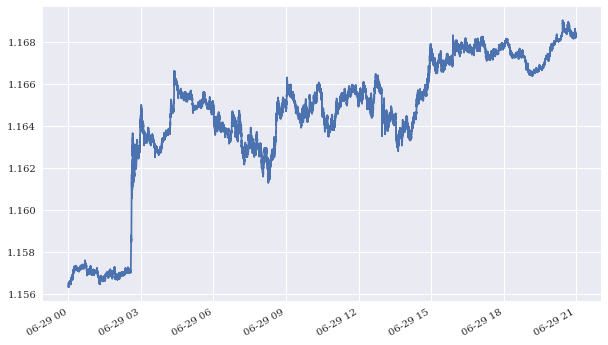

In [0]:
tick['Mid'].plot(figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_14.png');

In [0]:
tick_resam = tick.resample(rule='5min', label='right').last()

In [0]:
tick_resam.head()

,Bid,Ask,Mid
2018-06-29 00:05:00,1.15649,1.15651,1.156500
2018-06-29 00:10:00,1.15671,1.15672,1.156715
2018-06-29 00:15:00,1.15725,1.15727,1.157260
2018-06-29 00:20:00,1.15720,1.15722,1.157210
2018-06-29 00:25:00,1.15711,1.15712,1.157115


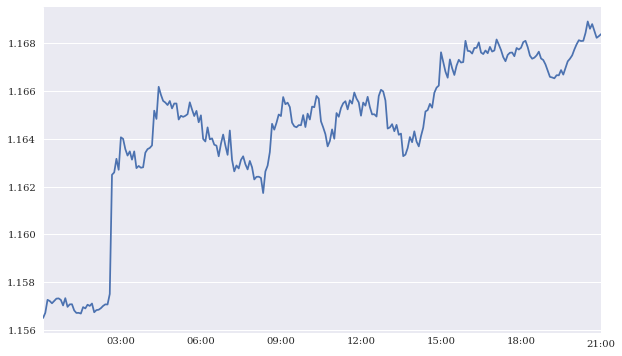

In [0]:
tick_resam['Mid'].plot(figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_15.png');

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>